<a href="https://colab.research.google.com/github/bcdmodelos/qualificacao-modelscode/blob/main/CodigosAnalises/baseDeDadosCovidBairros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da Base de dados COVID-19 Bairros da Cidade de Campina Grande



Bairro - Bodocongó

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls

drive  sample_data


In [4]:
%cd /content/drive/MyDrive/Notebooks_Doutorado/base-campina/

!ls

/content/drive/MyDrive/Notebooks_Doutorado/base-campina
dataset_Amazonas_usableData.csv
dataset_Bodocongo_usable.csv
dataset_Brasil_usableData.csv
dataset_CampinaGrande_casos_acumulados_usable.csv
dataset_CampinaGrande_casos_diarios_usable.csv
dataset_CampinaGrande_usableData.csv
dataset_Catole_usable.csv
dataset_Malvinas_usable.csv
dataset_Paraiba_usableData.csv
dataset_Pernambuco_usableData.csv


In [5]:
file_path = "./dataset_Bodocongo_usable.csv"
bairroBodocongo= pd.read_csv(file_path, encoding='latin1')
bairroBodocongo.head()

,Data,Estado,Cidade,Teste,Resultado,Evolucao,Data PCR,Conclusao,Data Encerramento,Classificacao Final,...,Sexo,Cidade Residencia,Data Nascimento,CEP,Bairro,cum_casos,cep,cep_valido,lat,long
0,2020-04-21,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cura,21/4/2020,Concluído,24/8/2020,Confirmado Laboratorial,...,Masculino,Campina Grande,11/12/1971,58.430-440,BODOCONGO,84,58430440,True,-7.222431,-35.917870
1,2020-04-26,Paraíba,João Pessoa,RT-PCR,Positivo,Cura,26/4/2020,Concluído,27/7/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,31/7/1977,58.430-768,BODOCONGO,111,58430768,True,-7.212799,-35.923563
2,2020-05-07,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cura,7/5/2020,Concluído,10/8/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,10/9/1961,58.446-000,BODOCONGO,273,58446000,True,-7.229075,-35.880834
3,2020-05-11,Paraíba,Campina Grande,RT-PCR,Positivo,Cura,11/5/2020,Concluído,27/7/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,28/7/1974,58.446-000,BODOCONGO,375,58446000,True,-7.229075,-35.880834
4,2020-05-12,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cura,12/5/2020,Concluído,21/5/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,31/10/1976,58.430-410,BODOCONGO,425,58430410,True,-7.221744,-35.917945


In [6]:
casosDiariosBodocongo = bairroBodocongo['Data'].value_counts(sort=False)
casosAcumuladosBodocongo = casosDiariosBodocongo.cumsum()
casosAcumuladosBodocongo

2020-04-21      1
2020-04-26      2
2020-05-07      3
2020-05-11      4
2020-05-12      5
             ... 
2021-06-22    898
2021-06-23    899
2021-06-24    900
2021-06-27    901
2021-06-30    903
Name: Data, Length: 303, dtype: int64

In [7]:
datasBodocongo = bairroBodocongo['Data'].unique()

In [8]:
datasBodocongo

array(['2020-04-21', '2020-04-26', '2020-05-07', '2020-05-11',
       '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
       '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
       '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-25',
       '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
       '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
       '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07',
       '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
       '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15',
       '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
       '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23',
       '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27',
       '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01',
       '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05',
       '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
       '2020-07-10', '2020-07-11', '2020-07-12', '2020-

In [9]:
casosAcumuladosBodocongo = casosAcumuladosBodocongo.tolist()

In [10]:
dfBodocongo = pd.DataFrame(datasBodocongo, columns=['Data'])

In [11]:
dfCasosBodocongo = pd.DataFrame(casosAcumuladosBodocongo, columns=['Casos_Acumulados'])

In [12]:
dfBodocongo['Casos_Acumulados'] = dfCasosBodocongo['Casos_Acumulados']

In [13]:
dfBodocongo

,Data,Casos_Acumulados
0,2020-04-21,1
1,2020-04-26,2
2,2020-05-07,3
3,2020-05-11,4
4,2020-05-12,5
...,...,...
298,2021-06-22,898
299,2021-06-23,899
300,2021-06-24,900
301,2021-06-27,901


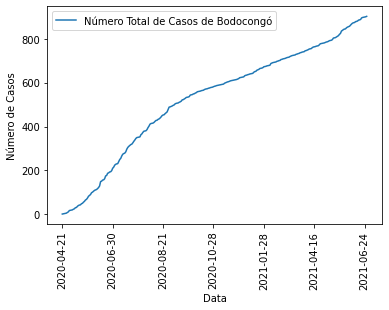

In [14]:
dfBodocongo.plot(x="Data", y="Casos_Acumulados",ylabel="Número de Casos",label="Número Total de Casos de Bodocongó")
plt.tick_params(axis='x', labelrotation= 90)

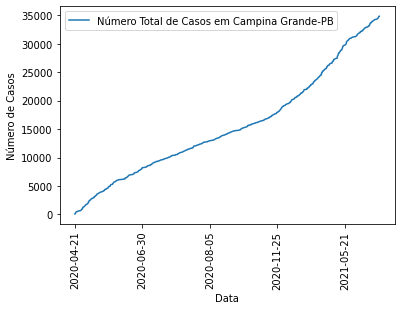

In [15]:
bairroBodocongo.plot(x="Data", y="cum_casos",ylabel="Número de Casos",label="Número Total de Casos em Campina Grande-PB")
plt.tick_params(axis='x', labelrotation= 90)

Bairro - Catolé

In [16]:
file_path = "./dataset_Catole_usable.csv"
bairroCatole= pd.read_csv(file_path, encoding='latin1')
bairroCatole.head()

,Data,Estado,Cidade,Teste,Resultado,Evolucao,Data PCR,Conclusao,Data Encerramento,Classificacao Final,...,Sexo,Cidade Residencia,Data Nascimento,CEP,Bairro,cum_casos,cep,cep_valido,lat,long
0,2020-03-23,Paraíba,Campina Grande,RT-PCR,Positivo,Cura,23/3/2020,Concluído,25/8/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,24/6/1976,58.446-000,CATOLE,33,58446000,True,-7.229075,-35.880834
1,2020-04-14,Paraíba,Campina Grande,RT-PCR,Positivo,Cura,14/4/2020,Concluído,27/7/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,12/7/1992,58.410-235,CATOLE,51,58410235,True,-7.233249,-35.881792
2,2020-04-23,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cura,23/4/2020,Concluído,27/8/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,1/5/1982,58.410-235,CATOLE,99,58410235,True,-7.233249,-35.881792
3,2020-04-24,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cancelado,24/4/2020,Concluído,NaN,NaN,...,Feminino,Campina Grande,12/7/1992,58.410-235,CATOLE,104,58410235,True,-7.233249,-35.881792
4,2020-05-02,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cura,2/5/2020,Concluído,6/8/2020,Confirmado Laboratorial,...,Masculino,Campina Grande,29/9/1985,58.410-370,CATOLE,152,58410370,True,-7.235099,-35.880562


In [17]:
casosDiariosCatole = bairroCatole['Data'].value_counts(sort=False)
casosAcumuladosCatole = casosDiariosCatole.cumsum()
casosAcumuladosCatole

2020-03-23       1
2020-04-14       2
2020-04-23       3
2020-04-24       4
2020-05-02       6
              ... 
2021-06-23    1317
2021-06-25    1322
2021-06-26    1325
2021-06-29    1326
2021-06-30    1327
Name: Data, Length: 338, dtype: int64

In [18]:
datasCatole = bairroCatole['Data'].unique()

In [19]:
datasCatole

array(['2020-03-23', '2020-04-14', '2020-04-23', '2020-04-24',
       '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
       '2020-05-08', '2020-05-10', '2020-05-11', '2020-05-12',
       '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-17',
       '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
       '2020-05-22', '2020-05-23', '2020-05-25', '2020-05-26',
       '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
       '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
       '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
       '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
       '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
       '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
       '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
       '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
       '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
       '2020-07-03', '2020-07-04', '2020-07-05', '2020-

In [20]:
casosAcumuladosCatole = casosAcumuladosCatole.tolist()

In [21]:
dfCatole = pd.DataFrame(datasCatole, columns=['Data'])

In [22]:
dfCasosCatole = pd.DataFrame(casosAcumuladosCatole, columns=['Casos_Acumulados'])

In [23]:
dfCatole['Casos_Acumulados'] = dfCasosCatole['Casos_Acumulados']

In [24]:
dfCatole

,Data,Casos_Acumulados
0,2020-03-23,1
1,2020-04-14,2
2,2020-04-23,3
3,2020-04-24,4
4,2020-05-02,6
...,...,...
333,2021-06-23,1317
334,2021-06-25,1322
335,2021-06-26,1325
336,2021-06-29,1326


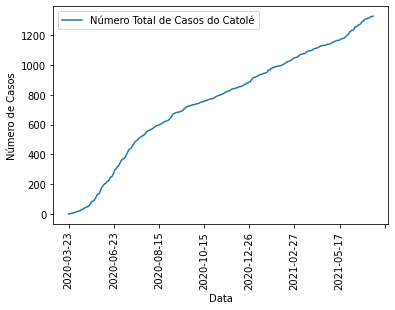

In [25]:
dfCatole.plot(x="Data", y="Casos_Acumulados",ylabel="Número de Casos",label="Número Total de Casos do Catolé")
plt.tick_params(axis='x', labelrotation= 90)


Bairro - Malvinas

In [26]:
file_path = "./dataset_Malvinas_usable.csv"
bairroMalvinas= pd.read_csv(file_path, encoding='latin1')
bairroMalvinas.head()

,Data,Estado,Cidade,Teste,Resultado,Evolucao,Data PCR,Conclusao,Data Encerramento,Classificacao Final,...,Sexo,Cidade Residencia,Data Nascimento,CEP,Bairro,cum_casos,cep,cep_valido,lat,long
0,2020-02-24,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cancelado,24/2/2020,Concluído,NaN,NaN,...,Masculino,Campina Grande,15/12/1989,58.433-184,MALVINAS,17,58433184,True,-7.235558,-35.925992
1,2020-02-24,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cura,24/2/2020,Concluído,18/8/2020,Confirmado Laboratorial,...,Masculino,Campina Grande,21/2/1964,58.432-515,MALVINAS,21,58432515,True,-7.242263,-35.919235
2,2020-03-22,Paraíba,Campina Grande,RT-PCR,Positivo,Cura,22/3/2020,Concluído,25/8/2020,Confirmado Laboratorial,...,Masculino,Campina Grande,31/12/1977,58.432-896,MALVINAS,32,58432896,True,-7.236888,-35.920585
3,2020-04-13,Paraíba,Campina Grande,RT-PCR,Positivo,Cancelado,13/4/2020,Concluído,16/11/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,25/9/1978,58.432-708,MALVINAS,45,58432708,True,-7.242735,-35.928483
4,2020-04-22,Paraíba,Campina Grande,RT-PCR,Positivo,Cura,22/4/2020,Concluído,10/7/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,1/9/1987,58.432-702,MALVINAS,91,58432702,True,-7.230473,-35.934272


In [27]:
casosDiariosMalvinas = bairroMalvinas['Data'].value_counts(sort=False)
casosAcumuladosMalvinas = casosDiariosMalvinas.cumsum()
casosAcumuladosMalvinas

2020-02-24       2
2020-03-22       3
2020-04-13       4
2020-04-22       5
2020-05-02       6
              ... 
2021-06-24    1355
2021-06-25    1360
2021-06-26    1362
2021-06-28    1363
2021-06-30    1365
Name: Data, Length: 339, dtype: int64

In [28]:
datasMalvinas = bairroMalvinas['Data'].unique()

In [29]:
datasMalvinas

array(['2020-02-24', '2020-03-22', '2020-04-13', '2020-04-22',
       '2020-05-02', '2020-05-11', '2020-05-12', '2020-05-13',
       '2020-05-14', '2020-05-15', '2020-05-17', '2020-05-18',
       '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
       '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
       '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
       '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
       '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
       '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
       '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
       '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
       '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
       '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
       '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
       '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
       '2020-07-07', '2020-07-08', '2020-07-09', '2020-

In [30]:
casosAcumuladosMalvinas = casosAcumuladosMalvinas.tolist()

In [31]:
dfMalvinas = pd.DataFrame(datasMalvinas, columns=['Data'])

In [32]:
dfCasosMalvinas = pd.DataFrame(casosAcumuladosMalvinas, columns=['Casos_Acumulados'])

In [33]:
dfMalvinas['Casos_Acumulados'] = dfCasosMalvinas['Casos_Acumulados']

In [34]:
dfMalvinas

,Data,Casos_Acumulados
0,2020-02-24,2
1,2020-03-22,3
2,2020-04-13,4
3,2020-04-22,5
4,2020-05-02,6
...,...,...
334,2021-06-24,1355
335,2021-06-25,1360
336,2021-06-26,1362
337,2021-06-28,1363


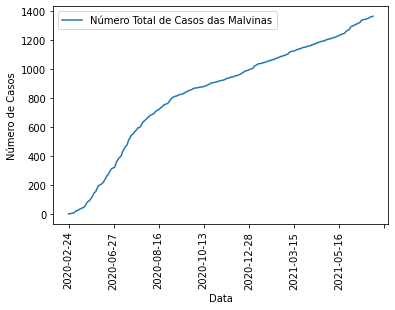

In [35]:
dfMalvinas.plot(x="Data", y="Casos_Acumulados",ylabel="Número de Casos",label="Número Total de Casos das Malvinas")
plt.tick_params(axis='x', labelrotation= 90)